# Project: Looking at a Stroop test dataset

#### By Logan Burke

---
For this exercise I am going to look at a Stroop dataset. This data was provided as part of the Udacity Data Analysis Nanodegree and was originally found at [this Google Drive link](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1591790658864000).

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition. [Discription from uDacity Google Drive](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True)


_Questions_:

_1. What is our independent variable? What is our dependent variable?_

The independent variable is the Stroop test, and the dependent variable is the reaction times recorded by the participants.


_2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices._

The Null hypotheses is that there is not a difference between the control and the Stroop test results.
The hypotheses is that there will be a delayed reaction for the participants from the control when testing under the Stroop test conditions.


---

In [18]:
#improting the basics I need for this

import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

#get the data I need from the csv file for the stroop data
stroop = pd.read_csv('stroopdata.csv')

A sample view of the data under investigation.

In [19]:
stroop.head(24) #quick look to make sure data came in correctly

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


_3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability._

Using the .describe method, we can see the mean for the two samples, the standard deviation, the minimum, max, as well as the 25%, 50% and 75% ranges. This gives us a quick overview of the data and its trends.

In [20]:
stroop.describe() #getting basic information from the data

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


_4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots._

In the boxplot below, it does appear that there is a diffrence between the two samples of data when participants take the same test under the Stroop effect conditions. There are some outliers though, which skews the mean a bit.

Text(0,0.5,'Time in Seconds')

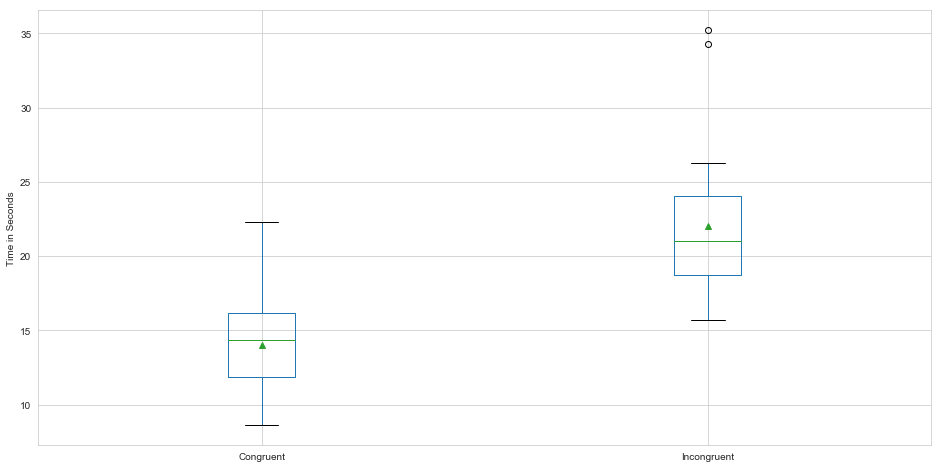

In [21]:
stroop.boxplot(showmeans=True, labels=('Cong', 'Incong'),figsize=(16,8) )   #create boxplot of the data
plt.ylabel('Time in Seconds') #label the y axis

Looking at the simple plot below, we see the diffrence graphed for each participant and see that every one of them had an increased time to complete the same task while under the Stroop effect conditions. 

Text(0,0.5,'Time in Seconds')

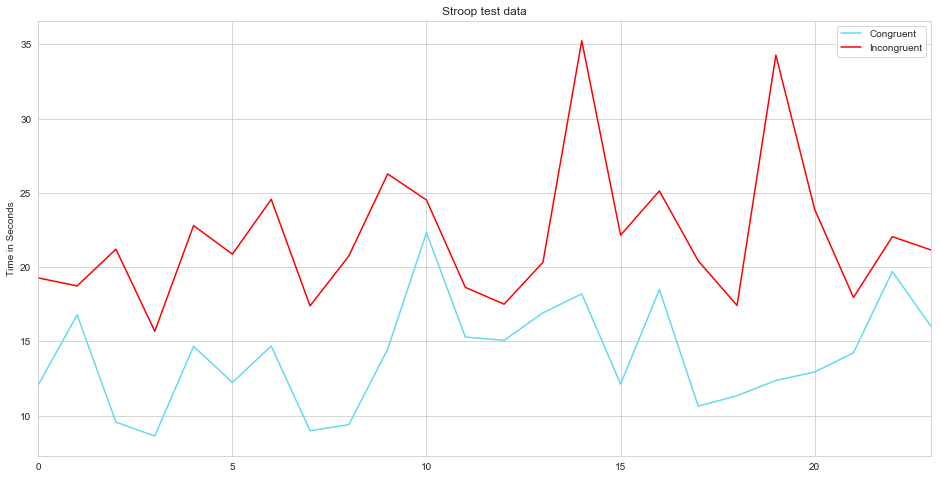

In [22]:
stroop.plot(title = 'Stroop test data', legend = True,  color=['#62daf0', 'red'],figsize=(16,8))
plt.ylabel('Time in Seconds')

_5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?_

In [23]:
stats.ttest_rel(stroop['Congruent'],stroop['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

degrees of freedom is 23 and its critical statistic value is -1.714

In [24]:
mean, sigma = stroop.mean(), stroop.std(ddof=1)
conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
print conf_int
print mean

(array([ 7.07491159, 12.61385747]), array([21.02733841, 31.41797586]))
Congruent      14.051125
Incongruent    22.015917
dtype: float64


#### Conclusion

With an alpha of 0.05, the T statistic is -8.0207 which passes the T critical value of -1.714. The p-value is close to zero, and is less than the alpha of 0.05 and so the null hypothesis is rejected, and instead we can go with the hypothesis proving the argument that the Stroop test conditions are correct, that there is a slow down in reaction times for the participants. This makes sense, as based on real world observations corroborate this. The end results, based on this data, is that the Stroop effect is real.

##### References
1. [Python Statistics](https://realpython.com/python-statistics/)
2. [Wikipedia: Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect)
3. [Towards Data Science](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f#:~:text=What%20is%20t%2Dtest%3F,t%2Ddistribution)
4. [SciPy T test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)